In [80]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection ,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [79]:
style.use('ggplot')

## with preprocessing we can keep our features between -1 to +1

In [3]:
df=quandl.get("WIKI/GOOGL")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

### Discarding the irrerelevant features

In [7]:
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [8]:
df["HL_PCT"]= (df["Adj. High"]  - df["Adj. Close"])/ df["Adj. Close"]*100 #calculating the high-low percentage

In [9]:
df["PCT_change"]= (df["Adj. Close"]  - df["Adj. Open"])/ df["Adj. Open"]*100 #calculating the high-low percentage

In [10]:
df=df[["Adj. Close","HL_PCT", "PCT_change","Adj. Volume" ]]

In [11]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [12]:
forecast_col='Adj. Close'

In [13]:
df.fillna(-9999 , inplace= True) #to fill the nan values with some outlier value instead of removing the values because removing them will be expensive


In [39]:
forecast_out= int(math.ceil(0.1*len(df))) #math.ceil will round-off the value to the nearest integer greater than then the value
#say 0.2 then math.ceil will give 1.0
#ceil will return the float value and we will convert it in integer with int
print(forecast_out)

31


so when we make predictions we are make predictions 31days ahead

In [27]:
df['label']= df[forecast_col].shift(-forecast_out)
#shifting the column negatively or shifted up so this way our adjusted close will be 0.1 or 10days into the future

In [28]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,67.739104
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.399229
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.752232
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,69.639972
2004-08-25,53.164113,1.886792,1.183658,9188600.0,69.078238


In [29]:
df.dropna(inplace=True)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-09-22,815.95,0.381151,0.734568,1759290.0,781.10
2016-09-23,814.96,0.250319,-0.022082,1411673.0,802.03
2016-09-26,802.65,0.925684,-0.885382,1472732.0,811.98
2016-09-27,810.73,0.340434,1.109961,1367271.0,805.59
2016-09-28,810.06,0.023455,0.743707,1470280.0,780.29


Now we will define our X(features) and y(output)

In [33]:
X=np.array(df.drop(["label"],1))
y=np.array(df["label"])

In [34]:
X=preprocessing.scale(X)

In [35]:
print(len(X), len(y))

3050 3050


### Split the data into training and testing

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [41]:
clf_lr=LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
accuracy_lr=clf_lr.score(X_test,y_test)
#squared error

In [43]:
clf_svm=svm.SVR()
clf_svm.fit(X_train, y_train)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
accuracy_svm=clf_svm.score(X_test,y_test)

In [46]:
print("linear regression ={} ". format(accuracy_lr))
print("SVM ={} ". format(accuracy_svm))

linear regression =0.9695933982702092 
SVM =0.7918039566109623 


### Predicting values for which we don't have the y values

In [58]:
X = np.array(df.drop(['label'],1))

In [59]:
X = np.array(df.drop(['label'],1))


In [60]:
X_lately = X[-forecast_out:] #upto 90%

In [61]:
X = X[-forecast_out:]#last 10%

In [64]:
len(X)

3019

In [69]:
df.dropna(inplace=True)
y=np.array(df["label"])
y=y[0:3019]

In [70]:
len(y)

3019

In [71]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [72]:
clf=LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
accuracy=clf.score(X_test,y_test)

In [75]:
forecast_set = clf.predict(X_lately)

In [77]:
print(forecast_set, accuracy, forecast_out)

[807.84919588 811.78337695 809.09471022 806.35732311 803.77813483
 803.25365316 800.01663704 797.77448941 799.00721255 802.18568035
 797.93615083 796.60231093 798.1827586  803.59571512 813.12815412
 814.40289289 808.99118864 793.87402178 803.84105016 794.79120267
 796.08054125 806.46076953 804.52705022 801.39504342 806.26472336
 811.34220972 821.40097552 821.34079018 808.83487464 816.12873079
 816.18642379] 0.9656120261075334 31


In [80]:
df["forecast"]=np.nan

In [81]:
last_date=df.iloc[-1].name
last_unix =last_date.timestamp()
one_day=86400
next_unix= last_unix+ one_day

In [92]:
for i in forecast_set:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)]+ [i]

df.tail()    

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,forecast
Date,,,,,,
2016-11-25 05:30:00,NaN,NaN,NaN,NaN,NaN,821.400976
2016-11-26 05:30:00,NaN,NaN,NaN,NaN,NaN,821.340790
2016-11-27 05:30:00,NaN,NaN,NaN,NaN,NaN,808.834875
2016-11-28 05:30:00,NaN,NaN,NaN,NaN,NaN,816.128731
2016-11-29 05:30:00,NaN,NaN,NaN,NaN,NaN,816.186424


The above snippet says
we will get the loc of index of the data-frame i.e our df index is a time stamp value so we are referencing to the index of the dataframe with loc[next_date]
so if the index doesnt exist it will create it but if it did exist it will just replace it
on the rhs side i.e [np.nan for _ in range(len(df.columns)-1)]+ [i]
we are just getting the list of values where the columns value is nan which can be seen when we print out the last few values

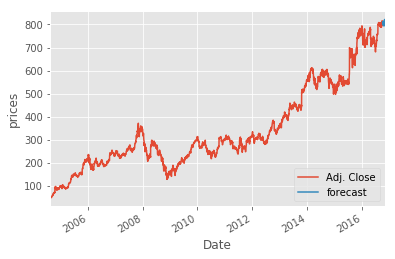

In [91]:

df['Adj. Close'].plot()
df["forecast"].plot()
plt.legend(loc=4) #4 means in the 4th axis
plt.xlabel("Date")
plt.ylabel("prices")
plt.show()

# Pickling and Scaling

pickling is a way of saving a file so one advantage of using pickling is that we want to save our classifiers so that we have huge value of data say gb's then we don't want to train our data with every predictions because that we will be computationally expensive so with the pickle we will just save the classifer and when we want to make predictions we will just restore then classifer and make predictions

In [93]:
import pickle

In [94]:
clf=LinearRegression()
clf.fit(X_train, y_train)


with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf,f) #this will save the classifer clf in f

In [95]:
#now when we want to open it then
pickle_in=open('linearregression.pickle' , 'rb')
clf=pickle.load(pickle_in)

# Linear Regression in depth

In linear regression we apply the formula y=mx + b to get the line of best find.. so considering if we have values of x, m and b we will easily calculate the y- values

Now, x is  the x coordinates 

m is the slope of the line which is given by ((mean of x)(mean of y)- (mean of xy))/(square of mean of x - mean of x^2)

b is the y-intercept which is given by mean of y - slope(m)* mean of x


In [40]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [41]:
style.use('fivethirtyeight')

Building a toy data on our own 

In [44]:
#xs= np.array([1, 4, 3, 2, 5 ,8 ,6, 4 , 8 ,7], dtype= np.float64)

#ys= np.array([2, 5, 4, 1, 3 ,6 ,5, 3 , 9 ,6], dtype= np.float64)

xs= np.array([1, 2 ,3 ,4 ,5 ,6 ,7 , 8, 9], dtype= np.float64)

ys= np.array([5,4,6,5,6,7 ,8, 7 ,9], dtype= np.float64)

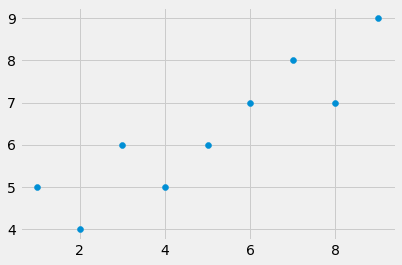

In [45]:
plt.scatter(xs,ys) #scatter plot
plt.show()

Now we will create a function to caluclate the slope of the line of best fit

In [46]:
def best_slope(xs,ys):
    x_bar = mean(xs)
    y_bar = mean(ys)
    m= (((x_bar * y_bar) - mean(xs*ys)) /
        ((x_bar* x_bar) - mean(xs * xs)))
    
    return m

#PEMDAS

In [47]:
m=best_slope(xs , ys)
print(m)

0.5166666666666674


In [48]:
def best_intercept(xs , ys):
    y_bar= mean(ys)
    x_bar = mean(xs)
    m=best_slope(xs ,ys)
    
    b=(y_bar - (m*x_bar))
    return b

In [49]:
b=best_intercept(xs,ys)
print(b)

3.749999999999996


In [76]:
def squared_error(ys , ys_line):
    """We calculate the square error by finding the square of the difference between the y_points and the regression line"""
    return sum((ys_line - ys)**2)

In [77]:
def coeff_of_deter(ys , ys_line):
    #print(ys_orig)
    y_mean_line = [mean(ys) for y in ys]
    squared_error_reg = squared_error(ys , ys_line)
    squared_error_y_mean = squared_error(ys , y_mean_line)
    return 1-(squared_error_reg/squared_error_y_mean)

In [78]:
#finding the regression line

reg_line = [ (m*x) +b for x in xs]

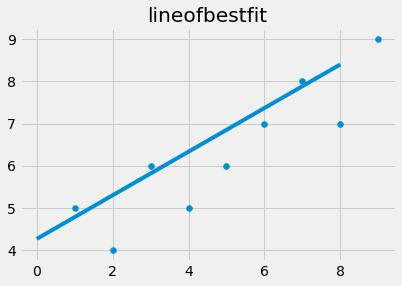

In [69]:
plt.scatter(xs, ys)
plt.plot(reg_line)
plt.title("lineofbestfit")
plt.show()

Now this our model predicting the line of best fit and if we have test data then let's how it pans out

In [70]:
predict_x= 10
#now with the formula y=mx+b we will predict y
predict_y = (m*predict_x + (b))

In [79]:
r_sq= coeff_of_deter(ys, reg_line)
print(r_sq)

0.8008333333333333


r^2 = 0.8 then we save that SEy_hat/SE mean(y) =0.2 which means only 2% values are incorrect predictions

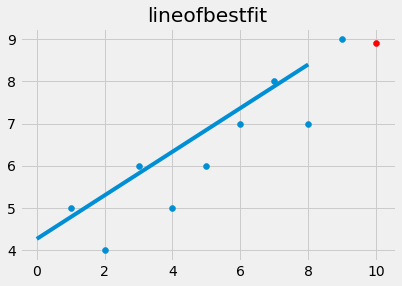

In [54]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y , color= 'r')
plt.plot(reg_line)
plt.title("lineofbestfit")
plt.show()

The red value is the predicted value

But one question arises is the line of best fit is really a "line of best fit" i.e. how accuracte is the line of best fit

### Calculating the accuracy of the best fit ( R-squared or coefficient of Determination)

We calculate this error by finding how above and below our datapoints are from the line of best fit and then square the distance.

Why the reason of squaring :
1. to eliminate the negative and positive distance clashes.
But we can also use absolute error to overcome the negative and positive distances because we want to penalise the outliers.

2. Higher powers of r could result in complex optimation operations.

# r^2 = (1 - SEy_hat/SE mean(y))

where SE means squared error 
y_hat =regression line or line of best fit

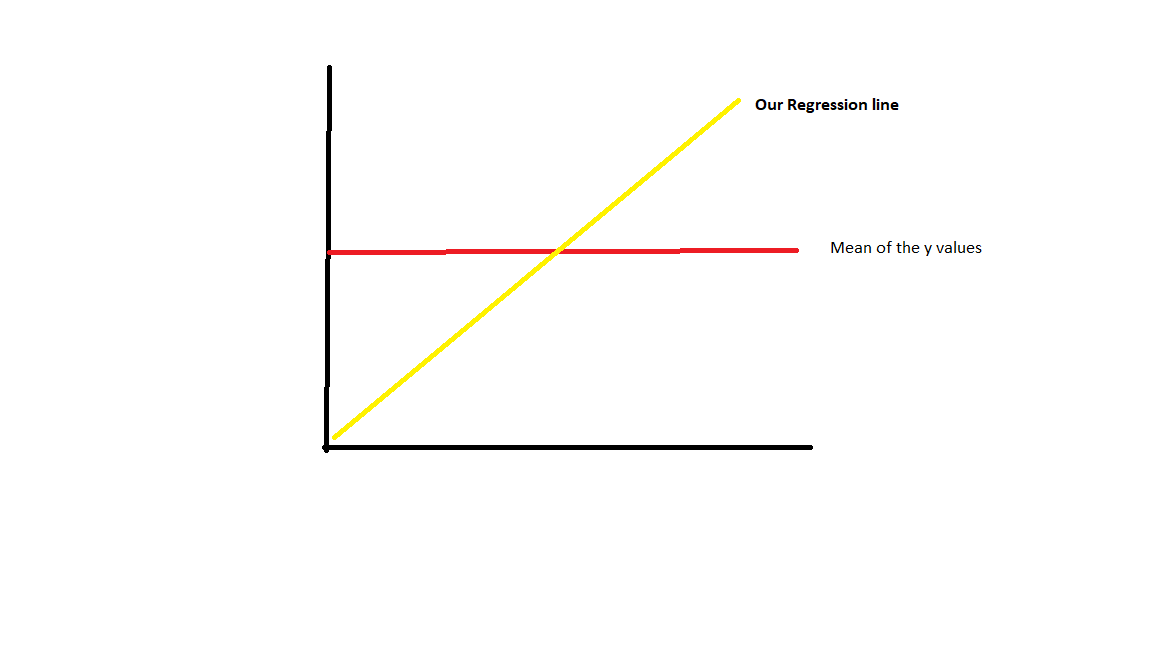

### So what r^2 really does is that it compares the accuracy of the line of means of ys and the accuracy of our regression line.

So we have values of r^2 lying between 0-1 and we want to have r values as high as possible or as close as possible to 1

## Testing our assumptions we have made above

In [85]:
def dataset(hm, variance , step=2 , correlation= False):
    """hm : how many datapoints should be there in our dataset
        variance : how variable or different we want our dataset to be
        step= 2 : default value of 2 , steps means how far the y-values should be there from one another
        correlation : whether we want our dataset to be positive or negative or none correlation
    """
    val=1 #first value of y is 1
    ys= []
    for i in range(hm):
        y= val+ random.randrange(-variance , variance)
        ys.append(y)
    if correlation and correlation == 'pos':
        val += step
    
    elif correlation and correlation == 'neg':
        val -= step
    
    xs=[ i for i in range(len(ys))]
        
    return np.array(xs, dtype= np.float64) , np.array(ys, dtype= np.float64)

Q-> if correlation and correlation == 'pos':
why do we mention the same variable twice ? Isn't just 
if correlation == 'pos':
enough ?

Ans-> he used it for the default value,
for example if the user didn't input, a correlation value,
its default is False,
so the condition if correlation and correlation (False and False) wouldn't be true, so it would skip the condition, 
just for that

In [161]:
#dataset(hm, variance , step=2 , correlation= False)
xs , ys =dataset(50 , 50 , step=2 , correlation ="pos")

In [162]:
m=best_slope(xs , ys)
print(m)

-0.047298919567827134


In [163]:
b=best_intercept(xs,ys)
print(b)

1.3388235294117647


In [164]:
reg_line = [ (m*x) +b for x in xs]

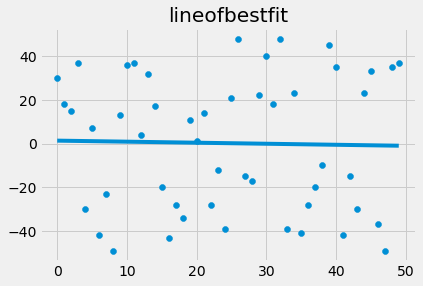

In [165]:
plt.scatter(xs, ys)
plt.plot(reg_line)
plt.title("lineofbestfit")
plt.show()

In [166]:
r_sq= coeff_of_deter(ys, reg_line)
print(r_sq)

0.0004989724382056249


our r-sq values in 0.00049 so that we can conclued that we have non-linear data

As the variance increases the r^sq values get closer to 0 and as it decreases the points comes closer and closer and therefore r-sq gets closer to 1 and we will fail to perform any linear regression task

In [142]:
predict_x= 10
#now with the formula y=mx+b we will predict y
predict_y = (m*predict_x + (b))

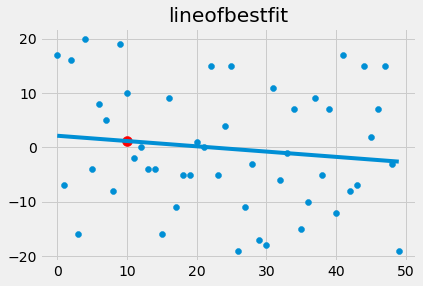

In [143]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y ,s=100, color= 'r') #s=100 will increase the size of the datapoint
plt.plot(reg_line)
plt.title("lineofbestfit")
plt.show()